# ***📌 Extracão***

In [33]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# ***🔧 Transformação***

In [34]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [35]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [36]:
df['customer'].head(3)


,customer
0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part..."
1,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."
2,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne..."


In [37]:
customer_df = pd.json_normalize(df['customer'])
customer_df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [38]:
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

df_expanded = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

In [39]:
df_expanded.isnull().sum()


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [40]:
df_expanded.duplicated().sum()


np.int64(0)

In [41]:
df_expanded['Churn'].unique()


array(['No', 'Yes', ''], dtype=object)

In [60]:
import numpy as np

df_expanded['Churn'].replace('', np.nan, inplace=True)


<ipython-input-60-276c5205a0e2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_expanded['Churn'].replace('', np.nan, inplace=True)


In [43]:
df_expanded['Churn'].isnull().sum()


np.int64(224)

In [44]:
df_expanded = df_expanded.dropna(subset=['Churn'])


In [45]:
df_expanded['Contas_Diarias'] = df_expanded['Charges.Monthly'] / 30


<ipython-input-45-21abed61fef4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_expanded['Contas_Diarias'] = df_expanded['Charges.Monthly'] / 30


In [46]:
df_expanded['Contas_Diarias'].describe()




,Contas_Diarias
count,7043.000000
mean,2.158723
std,1.003002
min,0.608333
25%,1.183333
50%,2.345000
75%,2.995000
max,3.958333


In [58]:
colunas_binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in colunas_binarias:
    df_expanded[col] = df_expanded[col].map({'Yes': 1, 'No': 0})


In [59]:
df_expanded['Charges.Monthly'] = pd.to_numeric(df_expanded['Charges.Monthly'], errors='coerce')
df_expanded['Charges.Total'] = pd.to_numeric(df_expanded['Charges.Total'], errors='coerce')


In [49]:
df_expanded[['tenure', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias']].describe()


,tenure,Charges.Monthly,Charges.Total,Contas_Diarias
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,2.158723
std,24.559481,30.090047,2266.771362,1.003002
min,0.000000,18.250000,18.800000,0.608333
25%,9.000000,35.500000,401.450000,1.183333
50%,29.000000,70.350000,1397.475000,2.345000
75%,55.000000,89.850000,3794.737500,2.995000
max,72.000000,118.750000,8684.800000,3.958333


In [50]:
df_clean = df_expanded.dropna(subset=['Churn', 'Charges.Total', 'tenure']).copy()


In [51]:
df_clean['Churn'] = df_clean['Churn'].astype(str)


# ***📊 Carga e análise***

In [52]:
df_expanded.describe()


,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Contas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [53]:
df_expanded[['tenure', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias']].agg(['mean', 'median', 'std', 'min', 'max'])


,tenure,Charges.Monthly,Charges.Total,Contas_Diarias
mean,32.371149,64.761692,2283.300441,2.158723
median,29.000000,70.350000,1397.475000,2.345000
std,24.559481,30.090047,2266.771362,1.003002
min,0.000000,18.250000,18.800000,0.608333
max,72.000000,118.750000,8684.800000,3.958333


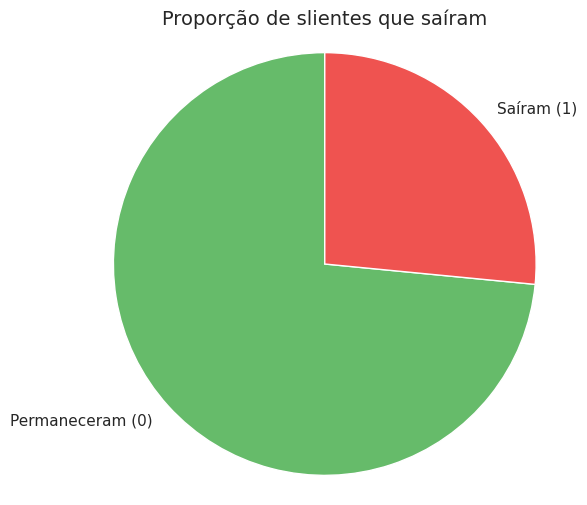

In [54]:
import matplotlib.pyplot as plt

churn_counts = df_expanded['Churn'].value_counts()
colors = ['#66bb6a', '#ef5350']
labels = ['Permaneceram (0)', 'Saíram (1)']

plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, colors=colors, startangle=90)
plt.title('Proporção de slientes que saíram', fontsize=14)
plt.axis('equal')
plt.grid(False)

plt.show()


<ipython-input-55-360a1f2febaa>:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
<ipython-input-55-360a1f2febaa>:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
<ipython-input-55-360a1f2febaa>:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


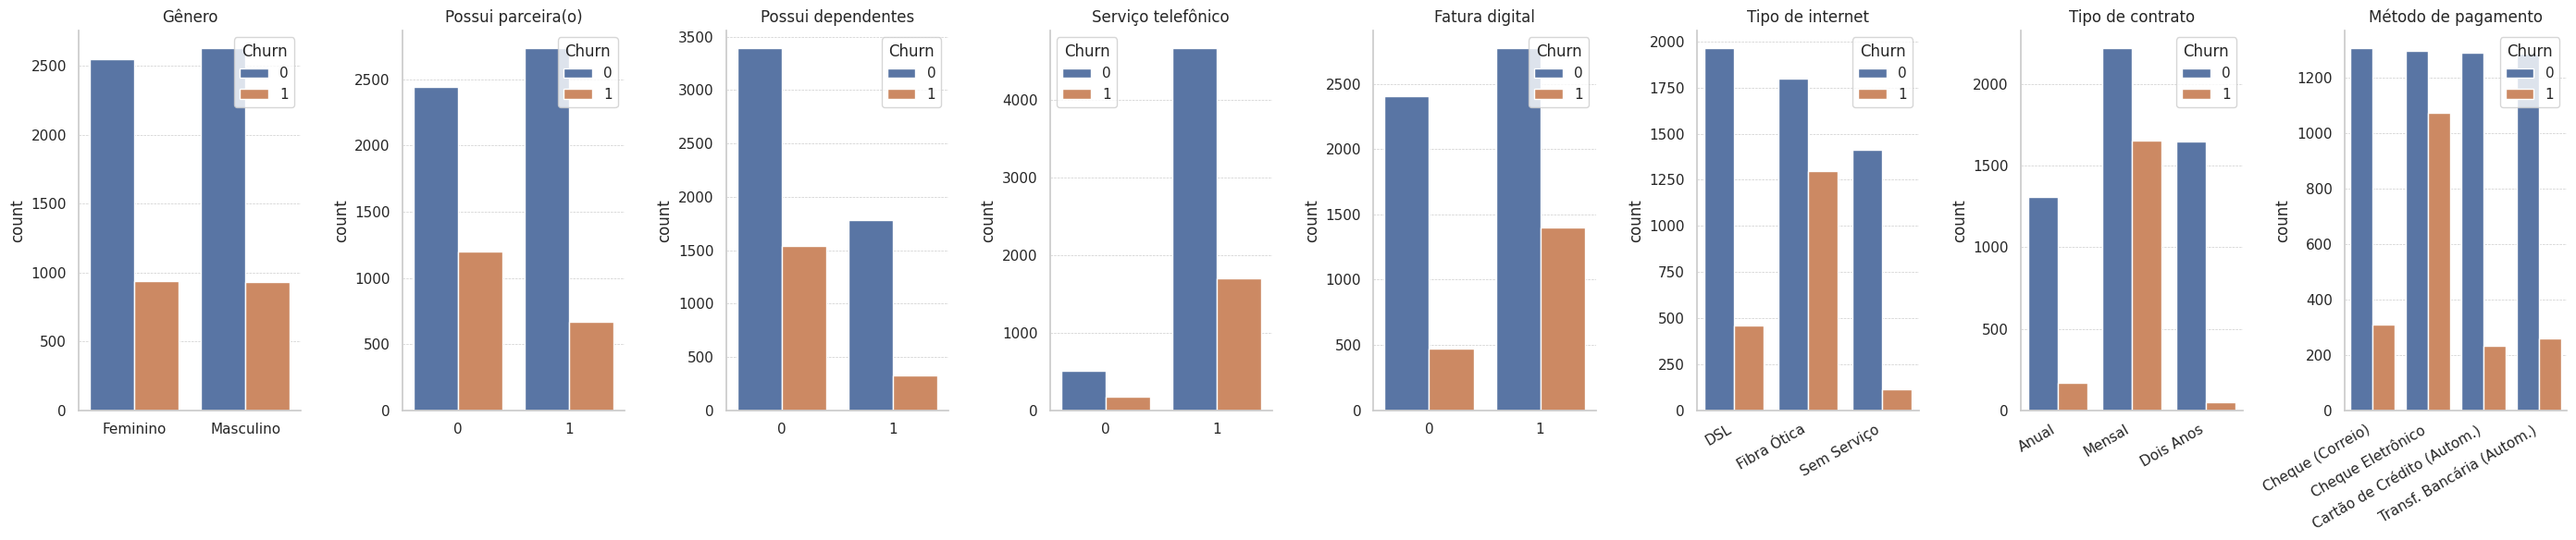

In [55]:
import seaborn as sns

df_traduzido = df_expanded.copy()

traducoes_eixo_x = {
    'gender': {
        'Female': 'Feminino',
        'Male': 'Masculino'
    },
    'InternetService': {
        'DSL': 'DSL',
        'Fiber optic': 'Fibra Ótica',
        'No': 'Sem Serviço'
    },
    'Contract': {
        'Month-to-month': 'Mensal',
        'One year': 'Anual',
        'Two year': 'Dois Anos'
    },
    'PaymentMethod': {
        'Mailed check': 'Cheque (Correio)',
        'Electronic check': 'Cheque Eletrônico',
        'Credit card (automatic)': 'Cartão de Crédito (Autom.)',
        'Bank transfer (automatic)': 'Transf. Bancária (Autom.)'
    }
}

for coluna, mapa in traducoes_eixo_x.items():
    df_traduzido[coluna] = df_traduzido[coluna].replace(mapa)

colunas = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
           'InternetService', 'Contract', 'PaymentMethod']

titulos = {
    'gender': 'Gênero',
    'Partner': 'Possui parceira(o)',
    'Dependents': 'Possui dependentes',
    'PhoneService': 'Serviço telefônico',
    'PaperlessBilling': 'Fatura digital',
    'InternetService': 'Tipo de internet',
    'Contract': 'Tipo de contrato',
    'PaymentMethod': 'Método de pagamento'
}

fig, axs = plt.subplots(1, len(colunas), figsize=(28, 6))

for i, col in enumerate(colunas):
    ax = axs[i]
    sns.countplot(data=df_traduzido, x=col, hue='Churn', ax=ax)

    ax.set_title(titulos[col])
    ax.set_xlabel('')
    ax.grid(True, linestyle='--', linewidth=0.5, axis='y')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if col in ['Contract', 'PaymentMethod', 'InternetService']:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

plt.tight_layout()
plt.show()

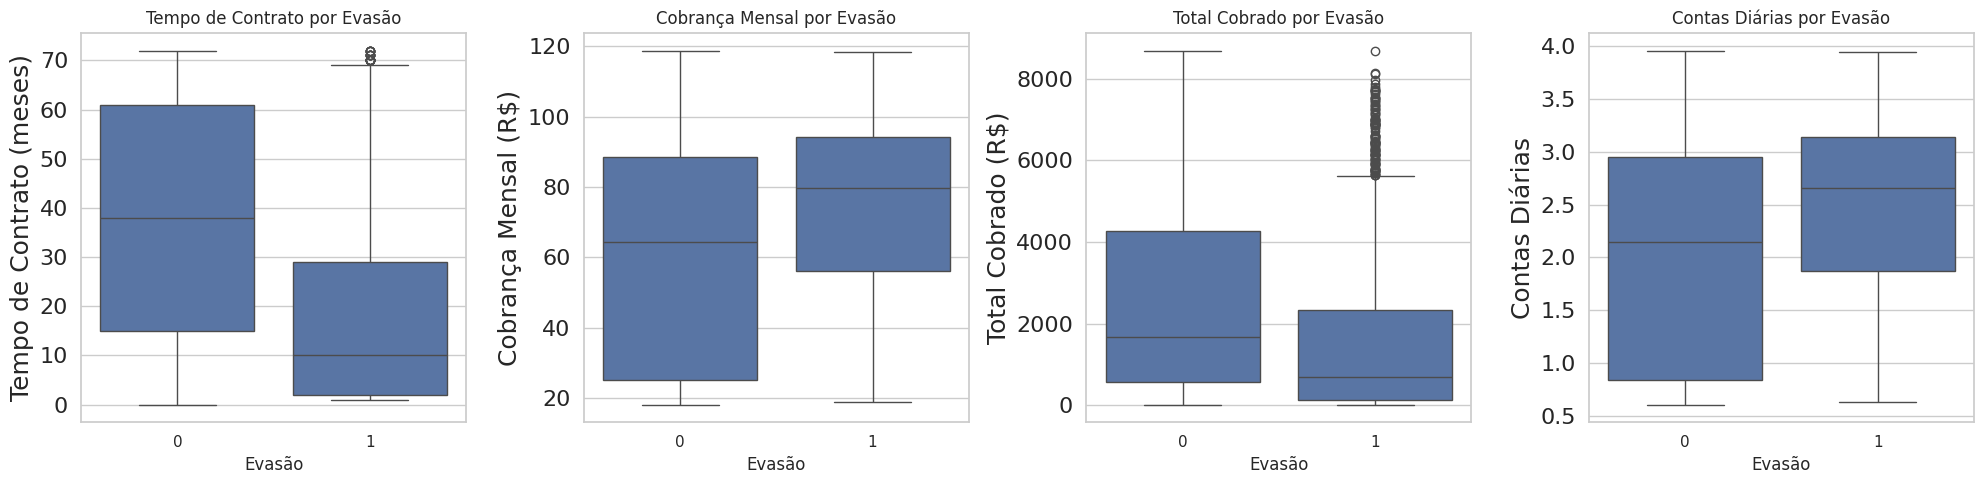

In [56]:
plt.figure(figsize=(20,5))

plt.subplot(1, 4, 1)
sns.boxplot(x='Churn', y='tenure', data=df_expanded)
plt.xlabel('Evasão')
plt.ylabel('Tempo de Contrato (meses)', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Tempo de Contrato por Evasão')

plt.subplot(1, 4, 2)
sns.boxplot(x='Churn', y='Charges.Monthly', data=df_expanded)
plt.xlabel('Evasão')
plt.ylabel('Cobrança Mensal (R$)', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Cobrança Mensal por Evasão')

plt.subplot(1, 4, 3)
sns.boxplot(x='Churn', y='Charges.Total', data=df_expanded)
plt.xlabel('Evasão')
plt.ylabel('Total Cobrado (R$)', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Total Cobrado por Evasão')

plt.subplot(1, 4, 4)
sns.boxplot(x='Churn', y='Contas_Diarias', data=df_expanded)
plt.xlabel('Evasão')
plt.ylabel('Contas Diárias', fontsize=18)
plt.yticks(fontsize=16)
plt.title('Contas Diárias por Evasão')

plt.tight_layout()
plt.show()


<ipython-input-57-e047dc948697>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(t)}%' for t in ax.get_yticks()])
<ipython-input-57-e047dc948697>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(t)}%' for t in ax.get_yticks()])
<ipython-input-57-e047dc948697>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(t)}%' for t in ax.get_yticks()])


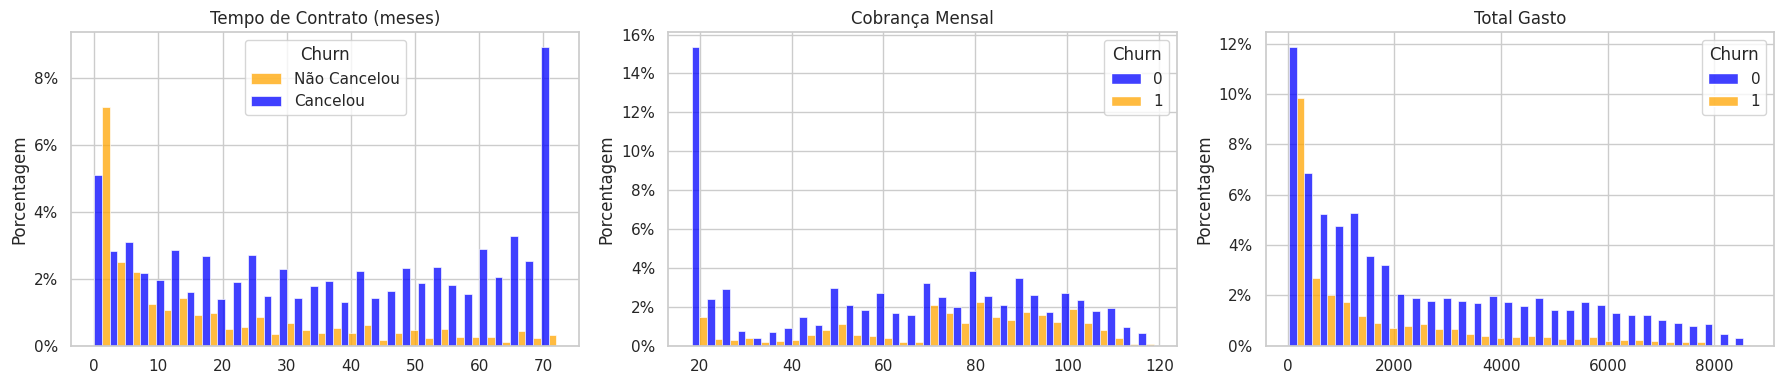

In [57]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

variaveis_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']
titulos = ['Tempo de Contrato (meses)', 'Cobrança Mensal', 'Total Gasto']

for i, var in enumerate(variaveis_numericas):
    ax = axs[i]
    sns.histplot(data=df_expanded, x=var, hue='Churn', stat='percent', multiple='dodge', bins=30,
                 palette={0: 'blue', 1: 'orange'}, ax=ax)
    ax.set_title(titulos[i])
    ax.set_ylabel('Porcentagem')
    ax.set_xlabel('')
    ax.set_yticklabels([f'{int(t)}%' for t in ax.get_yticks()])

axs[0].legend(title='Churn', labels=['Não Cancelou', 'Cancelou'])
plt.tight_layout()
plt.show()


# ***📄Relatorio Final***

# Relatório Final – Análise de Evasão de Clientes (Churn)

## 🧾 Introdução

Este projeto tem como objetivo analisar os dados de uma empresa de telecomunicações para entender os fatores que influenciam a **evasão de clientes (churn)**. Reduzir a evasão é crucial para a saúde financeira e o crescimento sustentável da empresa, pois reter clientes é geralmente mais barato do que adquirir novos.

A análise utiliza um conjunto de dados que contém informações demográficas, tipos de serviços contratados, formas de pagamento e métricas financeiras dos clientes.

---

## 🧹 Limpeza e Tratamento de Dados

Os principais passos realizados foram:

- **Importação dos dados** a partir de uma API, seguido da transformação em DataFrame.
- **Verificação de valores nulos**, com preenchimento ou exclusão quando necessário.
- Conversão de colunas categóricas e numéricas para os tipos corretos.
- Criação de colunas auxiliares, como `Contas Diárias`, `Evasão` (`Churn`) e categorias agrupadas.

Essas etapas garantiram que os dados estivessem prontos para análise, com consistência e padronização.

---

## 📊 Análise Exploratória de Dados

### 1. Distribuição Geral da Evasão

Analisamos a proporção de clientes que cancelaram seus contratos.

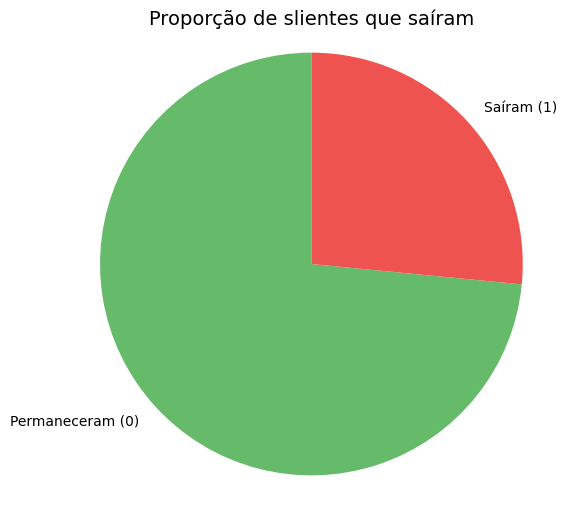

---

### 2. Evasão por Variáveis Categóricas

Foram utilizadas barras empilhadas para analisar a taxa de churn entre diferentes grupos:

- **Gênero**
- **Presença de parceiro(a)**
- **Dependentes**
- **Tipo de contrato**
- **Tipo de pagamento**
- **Tipo de serviço de internet**

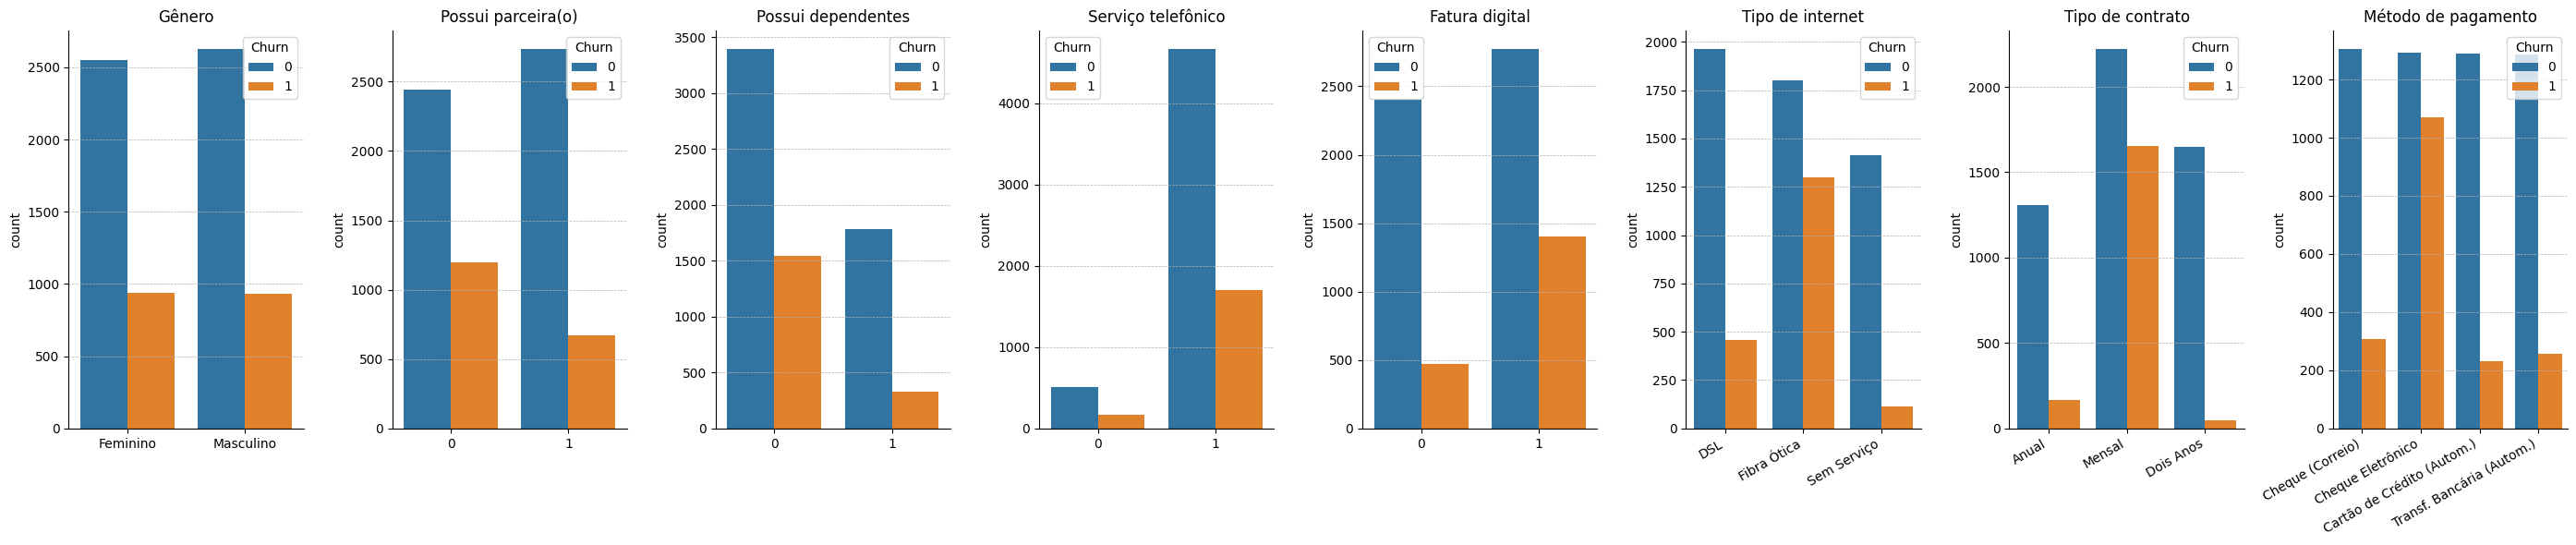

**Principais achados:**

- Contratos do tipo **mensal** apresentam maior evasão.
- Clientes com **fatura eletrônica** tendem a cancelar mais.
- Ter **dependentes** e **parceiros(as)** está associado a maior fidelidade.

---

### 3. Evasão por Variáveis Numéricas

#### a) Histogramas com Porcentagem

Visualizamos como variáveis contínuas se distribuem entre clientes que cancelaram ou não.

- **Tempo de Contrato (meses)**
- **Cobrança Mensal**
- **Total Gasto**

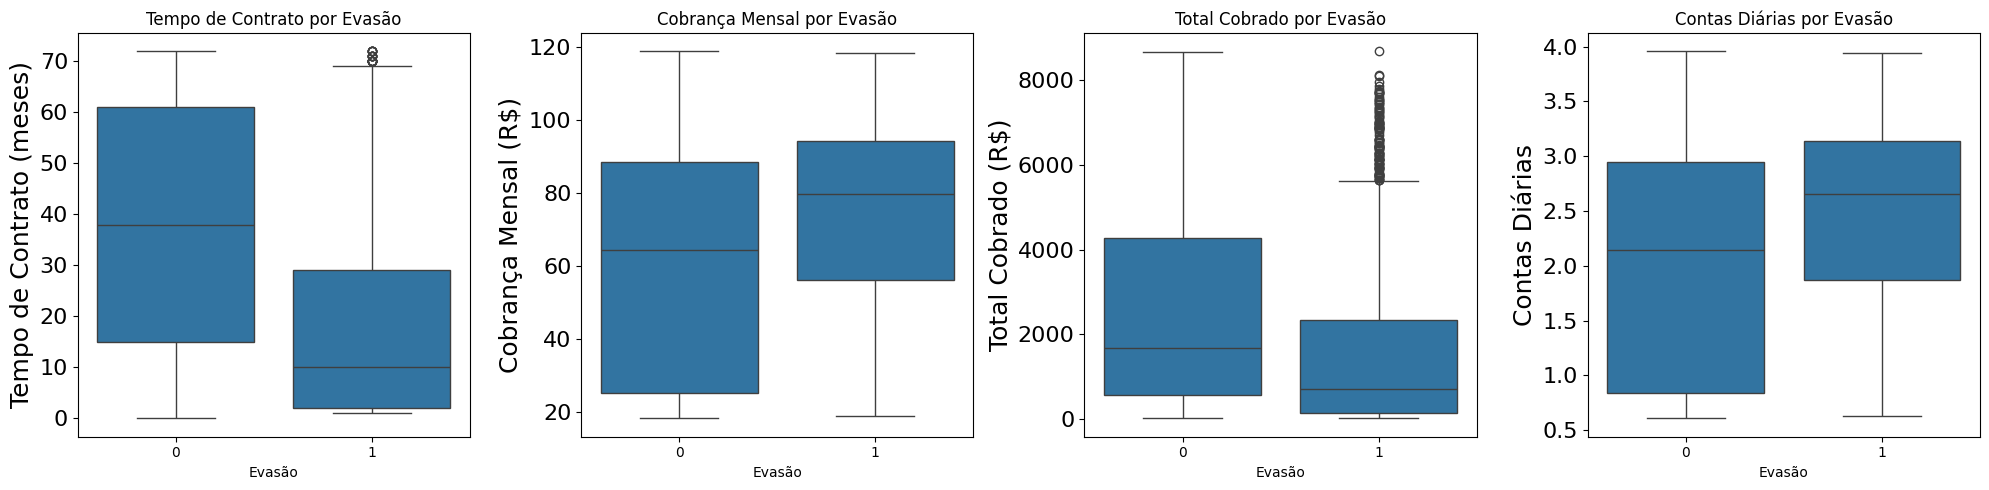

**Observações:**

- Quem tem **pouco tempo de contrato** cancela mais.
- **Cobranças mensais mais altas** estão associadas à evasão.
- Clientes que **gastaram menos no total** cancelam com mais frequência (possivelmente por serem mais novos).

#### b) Boxplots por Evasão

Para reforçar os padrões identificados, foram criados boxplots que comparam variáveis financeiras entre os dois grupos (cancelaram e não cancelaram):

- Tempo de contrato
- Cobrança mensal
- Total gasto

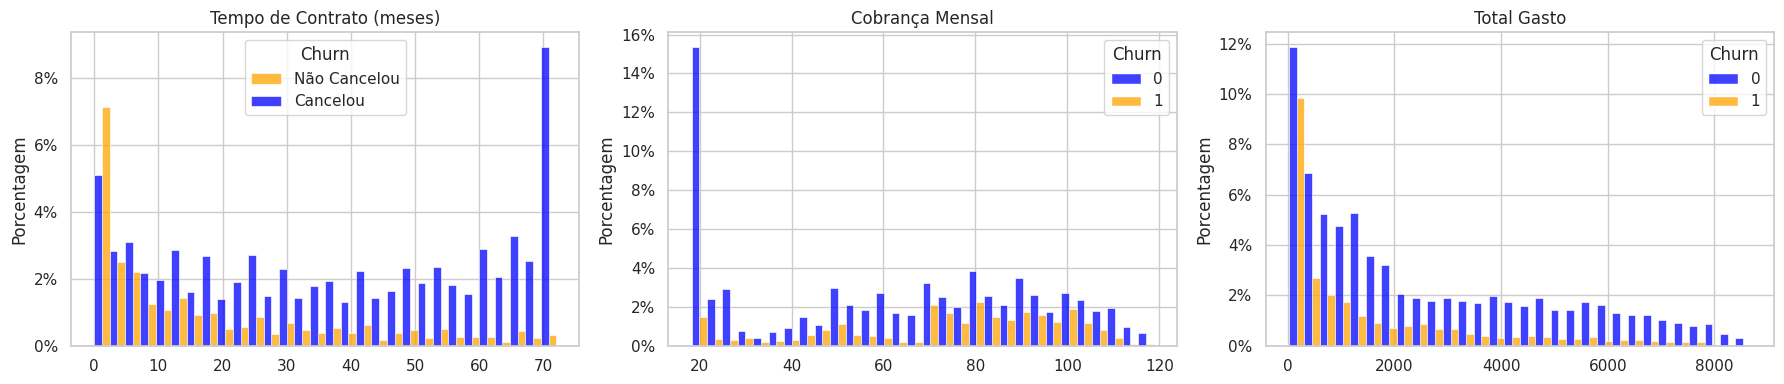
**Conclusões visuais:**

- Clientes que **ficaram** têm contratos mais longos e maior total gasto.
- Clientes que **cancelaram** apresentam maior mediana de cobrança mensal e mais contas diárias, indicando uso mais intenso dos serviços.

---

## 🧠 Conclusões e Insights

- A evasão está fortemente relacionada a **contratos de curto prazo** e **cobranças mensais elevadas**.
- **Clientes novos** e com **menor total gasto** têm maior probabilidade de sair.
- Serviços como **fatura eletrônica** e **internet via fibra** também se destacam como pontos de atenção.
- **Perfis familiares** (com parceiro(a) e filhos) tendem a ser mais fiéis.

---

## ✅ Recomendações

Com base na análise, recomendamos:

1. **Oferecer incentivos para contratos mais longos**, como descontos progressivos.
2. Criar **alertas para clientes com alto uso diário e cobrança mensal elevada**, sugerindo planos mais adequados.
3. Reavaliar a experiência de clientes com **fatura eletrônica**, tornando-a mais clara e personalizada.
4. Desenvolver campanhas específicas para **clientes novos**, incentivando a permanência nos primeiros meses.
5. Monitorar de perto clientes que contrataram **apenas um ou dois serviços**, pois eles demonstram maior taxa de evasão.

---

📌 Esta análise oferece uma base sólida para ações estratégicas de retenção. Para próximos passos, pode-se aplicar **modelos preditivos de churn** e simular cenários com base nos dados históricos.

